In [1]:
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^.*LAPACK bug 0038.*")

**1**. (25 points)

We can fit a polynomial equation to data using least squares via the so-called normal equations

$$
\beta = (X^TX)^{-1}X^Ty
$$

where $X$ is a matrix of coefficients, $y$ is the observed data and $\beta$ is a vector representation of the coefficients of the polynomial model

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \cdots + \beta_k x_i^k
$$

We show a simple example of this in matrix form 

$$
\pmatrix{y_1\\y_2\\y_3} = \pmatrix{1 & x_1 & x_1^2\\1 & x_2 & x_2^2\\1 & x_3 & x_3^2}\pmatrix{\beta_0\\ \beta_1 \\ \beta_2}
$$

- Use the normal equations to estimate coefficients for a cubic polynomial fit to the data in `df` (15 points)
- Plot an overlay of the fitted line on the data (10 points)

Hint:

- To solve a linear system $x = A^{-1}b$, we can use `np.linalg.solve(A, b)`

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
np.random.seed(123)

In [4]:
df = pd.read_csv('fe01.csv')
df

,x,y
0,0,9.914369
1,1,2.414369
2,2,-8.085631
3,3,-18.585631
4,4,-26.085631
5,5,-27.585631
6,6,-20.085631
7,7,-0.585631
8,8,33.914369
9,9,86.414369


In [5]:
n = df.shape[0]
X = np.c_[np.ones(n), df.x, df.x**2, df.x**3]
y = df.y
b = np.linalg.solve(X.T @ X, X.T@y)

In [6]:
b

array([ 9.9143694, -5.       , -3.       ,  0.5      ])

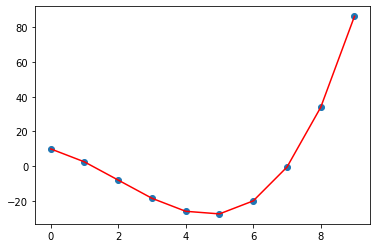

In [7]:
plt.scatter('x','y', data=df)
plt.plot(X@b, c='red')
pass

**2**. (25 points)

- Download the data from the URL given into a `pandas` DataFrame (5 points)
```
https://gist.github.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
```
- YOur objective is to predict the `mpg` of a car from `hp`, `wt` and `am`
    - Use the last 10 rows as test data and the rest as training data (5 points)
    - Train a multiple linear regression model on the training data (10 points)
    - Evaluate the mean squared error on the test data (5 points)
    
You may **only** use the following class from `sklearn`  (default parameters are fine)

- `sklearn.linear_model.LinearRegression`

In particular, splitting into test and train data and calculaiton of mean squared error should not use `sklearn`

In [8]:
url = 'https://gist.github.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
df = pd.read_csv(url)

In [9]:
df.shape

(32, 12)

In [10]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
X = df[['hp', 'wt', 'am']]
y = df['mpg']

In [12]:
X_train, X_test = X[:-10], X[-10:]
y_train, y_test = y[:-10], y[-10:]

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22, 3), (10, 3), (22,), (10,))

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = lr.predict(X_test)

In [18]:
np.mean((y_test - y_pred)**2)

5.119652781421606

**3**. (25 points)

![img](fe02.png)

Find a Python representation of the graph shown above as

- an edge list (5 points)
- find a minimum spanning tree (MST) by **inspection**  and express it as an **unweighted** adjacency list (10 points)
- encode the MST as a weighted graph in networkx and show the order of edges visited by a breadth-first search starting from node `f`


In [19]:
g1 = [
    ('b', 'a', 0.6),
    ('a', 'c', 0.2),
    ('a', 'd', 0.3),
    ('d', 'c', 0.1),
    ('c', 'f', 0.9),
    ('c', 'e', 0.7),
]

In [20]:
g2 = {
    'a': [('b', 0.6), ('c', 0.2), ('d', 0.3)],
    'b': [],
    'c': [('d', 0.1), ('e', 0.7), ('f', 0.9)],
    'd': [],
    'e': [],
    'f': []
}

In [21]:
mst = {
    'a': ['b', 'c'],
    'b': [],
    'c': ['d', 'e', 'f'],
    'd': [],
    'e': [],
    'f': []
}

In [22]:
import networkx as nx

In [23]:
g = nx.from_dict_of_lists(mst)

In [24]:
list(nx.bfs_edges(g, 'f'))

[('f', 'c'), ('c', 'a'), ('c', 'd'), ('c', 'e'), ('a', 'b')]

**4** (25 points)

Repeat exercise 2 using Spark `ml`.

The necessary Spark classes are imported for you.

In [25]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.pipeline import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import pow, mean

In [26]:
spark = SparkSession.builder.getOrCreate()

In [27]:
train = spark.createDataFrame(df[:-10])
test = spark.createDataFrame(df[-10:])

In [28]:
train.show(3)

+-------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|        model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|    Mazda RX4|21.0|  6|160.0|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|Mazda RX4 Wag|21.0|  6|160.0|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|   Datsun 710|22.8|  4|108.0| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
+-------------+----+---+-----+---+----+-----+-----+---+---+----+----+
only showing top 3 rows



In [29]:
va = VectorAssembler(inputCols=['hp', 'wt', 'am'], outputCol='features')

In [30]:
lr = LinearRegression(featuresCol='features', labelCol='mpg')

In [31]:
pipe = Pipeline(stages = [va, lr])

In [32]:
model = pipe.fit(train)

In [33]:
pred = model.transform(test)

In [34]:
pred.select(['mpg', 'prediction']).show()

+----+------------------+
| mpg|        prediction|
+----+------------------+
|15.2|18.400471598577326|
|13.3|13.082799701622022|
|19.2| 16.29575573131833|
|27.3| 28.40310826619019|
|26.0|26.774932660612826|
|30.4|27.219009382737667|
|15.8|16.411291839234455|
|19.7| 21.44094832044303|
|15.0|12.210812805630805|
|21.4|24.458019761904275|
+----+------------------+



In [35]:
pred.selectExpr('pow(mpg - prediction, 2) as squared_error').agg(mean('squared_error')).show()

+------------------+
|avg(squared_error)|
+------------------+
| 5.119652781421675|
+------------------+

